In [6]:
import pandas as pd
columns = ['Time','Action','User','Product','Quantity','Price']
orders = pd.read_csv("./day4/purchase_order.tab",sep='\t',parse_dates=[0],names=columns,encoding='utf-8') # parse_dates=[0]将日期列转换为日期类型
orders.head()

,Time,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      54772 non-null  datetime64[ns]
 1   Action    54772 non-null  object        
 2   User      54772 non-null  object        
 3   Product   54772 non-null  object        
 4   Quantity  54772 non-null  int64         
 5   Price     54721 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [11]:
orders[orders['Product']=='P0006944501']
orders[orders['Product']=='P0006944501']['Price']

0       1069.0
9       1069.0
775     1069.0
2511    1069.0
2515    1069.0
2522    1069.0
5457    1069.0
5706    1069.0
Name: Price, dtype: float64

In [14]:
orders[orders['Product']=='P0006944501']['Price'].describe()

count       8.0
mean     1069.0
std         0.0
min      1069.0
25%      1069.0
50%      1069.0
75%      1069.0
max      1069.0
Name: Price, dtype: float64

In [16]:
orders['Product'].unique()

array(['P0006944501', 'P0006018073', 'P0002267974', ..., 'P0022884606',
       'P0013911085', 'P0025123755'], dtype=object)

In [17]:
orders.groupby('Product')['Product'].count()

Product
P0000005913       3
P0000006020       1
P0000006591       1
P0000007744       2
P0000008190011    1
                 ..
P0025361851       1
P9913264561       8
P9913264760       8
P9913264771       2
P9913265165       1
Name: Product, Length: 20054, dtype: int64

In [21]:
orders.groupby('Product')['Price'].mean()

Product
P0000005913       1590.000
P0000006020       1290.000
P0000006591        999.000
P0000007744       3280.000
P0000008190011    5083.000
                    ...   
P0025361851       3149.000
P9913264561       3040.625
P9913264760       3000.000
P9913264771       3100.000
P9913265165        110.000
Name: Price, Length: 20054, dtype: float64

In [22]:
orders.groupby('Product')['Price'].mean().sort_values(ascending=False) # 按平均价降序排列

Product
P0000143511    438888.0
P0000143500    438888.0
P0006584093    320000.0
P0025280275    183900.0
P0000150006    111375.0
                 ...   
P0022822984         NaN
P0022827125         NaN
P0023532655         NaN
P0024243450         NaN
P0025213134         NaN
Name: Price, Length: 20054, dtype: float64

In [23]:
orders['Total_Price'] = orders['Price'] * orders['Quantity']
orders.head()

,Time,Action,User,Product,Quantity,Price,Total_Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,249.0


In [29]:
# 分析每个用户消费的总金额 并且按降序排序
orders.groupby('User')['Total_Price'].sum().sort_values(ascending=False).head()

User
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
U1006283751      515688.0
U10114715330     456782.0
Name: Total_Price, dtype: float64

In [5]:
import pandas as pd
columns = ['Time','Action','User','Product']
views = pd.read_csv("./day4/purchase_view.tab",sep='\t',parse_dates=[0],names=columns,encoding='utf-8') # parse_dates=[0]将日期列转换为日期类型
views.head()

,Time,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593
3,2015-07-01 00:00:05,view,U393805241,P0005541535
4,2015-07-01 00:00:10,view,U10004621134,P0022135540


In [15]:
orders.groupby(['User','Product'])['Product'].count().reset_index(name='buys')    # 每个用户购买的每种商品的数量并且重新命名为buys
orders_cnt = orders.groupby(['User','Product'])['Product'].count().reset_index(name='buys')
orders_cnt.head()

,User,Product,buys
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


In [16]:
#每个用户对每个商品的浏览数目
views_cnt = views.groupby(['User','Product'])['Product'].count().reset_index(name='buys')
views_cnt.head()


,User,Product,buys
0,None,PNone,1
1,U10000000225,P0007107111,1
2,U10000000225,P0007107122,1
3,U10000000225,P0007107413,1
4,U10000000225,P0009440001,1


In [23]:
views['Time'].dt.date.head() # 获取日期
views['Time'].dt.hour.head() # 获取小时
views['Time'].dt.minute.head() # 获取分钟
views['Time'].dt.month.head() # 获取分钟

0    7
1    7
2    7
3    7
4    7
Name: Time, dtype: int64

In [28]:
# 根据浏览日期统计浏览量
views_cnt_by_dates = views.groupby(views['Time'].dt.date)['Action'].count()
views_cnt_by_dates.head()

Time
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

### matplotlib

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='Time'>

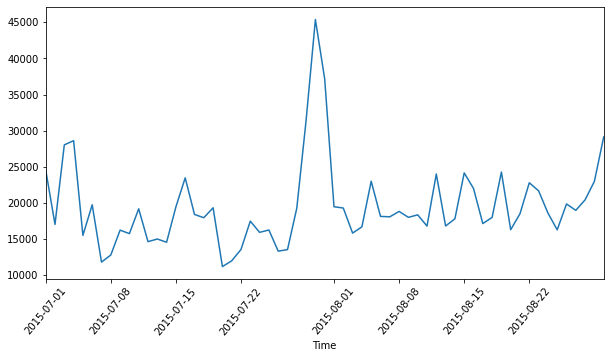

In [40]:
%pylab inline
views_cnt_by_dates.plot(kind='line',figsize=[10,5],rot=50)

In [43]:
orders_cnt_by_dates = orders.groupby(orders['Time'].dt.date)['Action'].count()
orders_cnt_by_dates.head()

Time
2015-07-01    2324
2015-07-02    2059
2015-07-03    1778
2015-07-04    2166
2015-07-05    1413
Name: Action, dtype: int64

In [48]:
df = pd.concat([orders_cnt_by_dates,views_cnt_by_dates],axis=1,sort=False)
df.dropna(inplace=True)

,Action,Action
2015-07-01,2324.0,24569
2015-07-02,2059.0,17043
2015-07-03,1778.0,28041
2015-07-04,2166.0,28625
2015-07-05,1413.0,15522
2015-07-06,1903.0,19756
2015-07-07,1046.0,11823
2015-07-08,1184.0,12809
2015-07-09,1585.0,16248
2015-07-10,1661.0,15763


In [50]:
df.columns=['Orders','Views']
df

,Orders,Views
2015-07-01,2324.0,24569
2015-07-02,2059.0,17043
2015-07-03,1778.0,28041
2015-07-04,2166.0,28625
2015-07-05,1413.0,15522
2015-07-06,1903.0,19756
2015-07-07,1046.0,11823
2015-07-08,1184.0,12809
2015-07-09,1585.0,16248
2015-07-10,1661.0,15763


<AxesSubplot:>

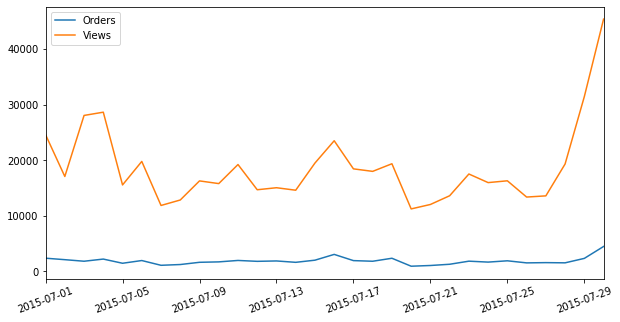

In [51]:
df.plot(kind='line',figsize=[10,5],rot=20)